## Bigmart Sales Prediction

### Background

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
data = pd.read_csv(r'C:\Users\espym.LAPTOP-41F90NSA\projects\practise\Sales Prediction\Data\train.csv')

### Data Exploration

In [3]:
# Checking random rows
data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6258,FDO15,NaN,Regular,0.008525,Meat,72.5038,OUT027,1985,Medium,Tier 3,Supermarket Type3,2512.7292
3710,FDI45,13.10,Low Fat,0.037581,Fruits and Vegetables,175.5054,OUT046,1997,Small,Tier 1,Supermarket Type1,2451.4756
7392,FDW50,13.10,Low Fat,0.076006,Dairy,166.1158,OUT017,2007,NaN,Tier 2,Supermarket Type1,1169.8106
1966,NCO54,NaN,low fat,0.024992,Household,53.6614,OUT019,1985,Small,Tier 1,Grocery Store,165.7842
5907,FDR14,11.65,Low Fat,0.174049,Dairy,52.9298,OUT046,1997,Small,Tier 1,Supermarket Type1,647.1576


In [4]:
# Checking the shape of the dataframe
data.shape

(8523, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# Summary statistics for the dataset
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Data Cleaning

In [7]:
# Checking null values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
# Checking for the percentage of null values
per_null = data.isnull().sum() * 100 / len(data)
per_null

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [9]:
# checking duplicates
data.duplicated().any()

False

In [10]:
# Handling the missing values
# Univariate imputation
mean_weight = data['Item_Weight'].mean()
meadian_weight = data['Item_Weight'].median()

In [11]:
print(mean_weight,meadian_weight)

12.857645184135976 12.6


In [12]:
data['Item_Weight_mean'] = data['Item_Weight'].fillna(mean_weight)
data['Item_Weight_median'] = data['Item_Weight'].fillna(meadian_weight)

In [13]:
print("original item variance:", data['Item_Weight'].var())
print("mean item variance:", data['Item_Weight_mean'].var())
print("median item variance:", data['Item_Weight_median'].var())

original item variance: 21.56168825983637
mean item variance: 17.860121735060453
median item variance: 17.869561454073366


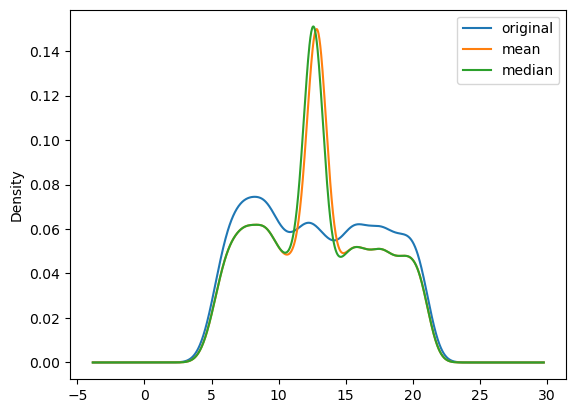

In [14]:
# Plotting for distribution in the after filling with mean and median
data['Item_Weight'].plot(kind='kde', label="original")

data['Item_Weight_mean'].plot(kind='kde', label="mean")

data['Item_Weight_median'].plot(kind='kde', label="median")

plt.legend()
plt.show()

In [15]:
data["Item_Weight_interpolate"]= data['Item_Weight'].interpolate(method="linear")

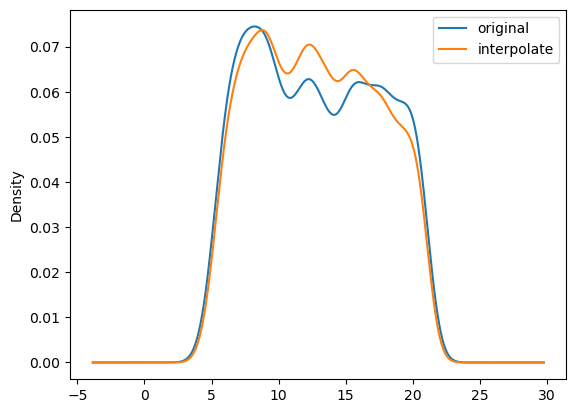

In [16]:
# Plotting for the distribution after interpolation
data['Item_Weight'].plot(kind='kde', label="original")

data['Item_Weight_interpolate'].plot(kind='kde', label="interpolate")

plt.legend()
plt.show()

In [17]:
# Using KNN 
from sklearn.impute import KNNImputer

In [18]:
knn =  KNNImputer(n_neighbors=10, weights="distance")

In [19]:
data['knn_imputer'] = knn.fit_transform(data[['Item_Weight']]).ravel()

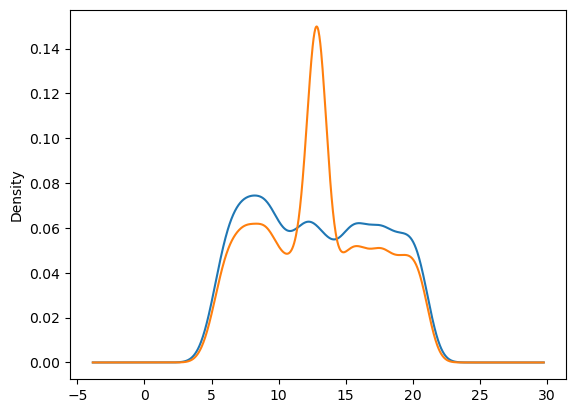

In [20]:
data['Item_Weight'].plot(kind='kde', label="original")

data['knn_imputer'].plot(kind='kde', label="knn imputer")

plt.show()

From the distributions, we can see that linear interpolation was the better method in filling values. The varience of the column wasn't affected as the rest of the methods i.e mean and KNN imputer

In [21]:
# Dropping irrelevant columns
data = data.drop(['Item_Weight', 'Item_Weight_mean', 'knn_imputer','Item_Weight_median'], axis=1)

In [22]:
# Previewing the data
data.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


In [23]:
# Checking missing values
data.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_interpolate         0
dtype: int64

In [24]:
# Filling missing values in outlet size
data['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [25]:
data['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [26]:
mode_outlet = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x : x.mode()[0]))

In [27]:
mode_outlet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [28]:
missing_val = data['Outlet_Size'].isnull()
missing_val

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [29]:
data.loc[missing_val, 'Outlet_Size'] = data.loc[missing_val,'Outlet_Type'].apply(lambda x: mode_outlet[x])

In [30]:
data.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_interpolate      0
dtype: int64

#### Handling data inconsistency in item fat column

In [31]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interpolate'],
      dtype='object')

In [32]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [33]:
data.replace({'Item_Fat_Content': {'LF' : "Low Fat", 'reg': "Regular", 'low fat': "Low Fat"}}, inplace=True)

In [34]:
# previewing the changes
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

### Handling inconsistency in Item Visibility Column

In [35]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interpolate'],
      dtype='object')

In [36]:
data['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

We can see that 526 entries have 0 as a value. We go ahead and handle them as missing values and fill them

In [37]:
#  Handling the inconsistency
data['Item_Visibility_interporlate'] = data['Item_Visibility'].replace(0, np.nan).interpolate(method='linear')

In [38]:
# Previewing the changes
data['Item_Visibility_interporlate'].value_counts()

Item_Visibility_interporlate
0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: count, Length: 8405, dtype: int64

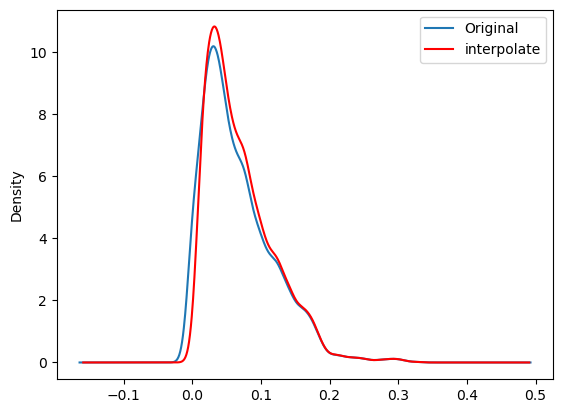

In [39]:
# Checking the distribution after filling the null values
data['Item_Visibility'].plot(kind='kde', label="Original")

data['Item_Visibility_interporlate'].plot(kind= 'kde', label='interpolate',color='red')

plt.legend()
plt.show()

In [40]:
# droppping the column
data =  data.drop(columns='Item_Visibility', axis=1)

In [41]:
# Checking inconsitency in Item Identifier

In [42]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interpolate', 'Item_Visibility_interporlate'],
      dtype='object')

In [43]:
data['Item_Identifier'].value_counts().head(5)

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
Name: count, dtype: int64

We can see that the first two letter are unique. We put them in the same column but with the first two letter

In [44]:
data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x : x[:2])

In [45]:
data['Item_Identifier'].value_counts()

Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [46]:
# Handling the outlet year
import datetime as dt

current_year = dt.datetime.today().year

current_year

2024

In [47]:
# Calculating the age of the outlets
# Assigning noutlet age to new column

data['outlet_age'] = current_year - data['Outlet_Establishment_Year']

In [48]:
# Dropping column
data.drop(columns='Outlet_Establishment_Year', axis=1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interporlate,outlet_age
0,FD,Low Fat,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,9.300,0.016047,25
1,DR,Regular,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,5.920,0.019278,15
2,FD,Low Fat,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,17.500,0.016760,25
3,FD,Regular,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,19.200,0.015755,26
4,NC,Low Fat,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,8.930,0.014751,37
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FD,Low Fat,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,6.865,0.056783,37
8519,FD,Regular,Baking Goods,108.1570,OUT045,Small,Tier 2,Supermarket Type1,549.2850,8.380,0.046982,22
8520,NC,Low Fat,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,10.600,0.035186,20
8521,FD,Regular,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,7.210,0.145221,15


### Handling Categorical variables

In [49]:
from sklearn.preprocessing import OrdinalEncoder

data_encoded =  data.copy()

cat_cols = data.select_dtypes(include=['object']).columns

for cat in cat_cols:
    oe = OrdinalEncoder()
    data_encoded[cat] = oe.fit_transform(data_encoded[[cat]])
    print(oe.categories_)
    

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['Low Fat', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [50]:
#previewing changes
data_encoded.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interporlate,outlet_age
0,1.0,0.0,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380,9.30,0.016047,25
1,0.0,1.0,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228,5.92,0.019278,15
2,1.0,0.0,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700,17.50,0.016760,25
3,1.0,1.0,6.0,182.0950,0.0,1998,2.0,2.0,0.0,732.3800,19.20,0.015755,26
4,2.0,0.0,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052,8.93,0.014751,37


### Modeling

In [51]:
# defining x and y
X = data_encoded.drop(columns='Item_Outlet_Sales',axis=1)
y = data['Item_Outlet_Sales']

# Random Forest Regressor

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores =  cross_val_score(rf, X, y, cv=5, scoring='r2')
print(scores.mean())

0.5555215660484545


### XGBRegressor

In [53]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(xg,X,y, cv=5, scoring='r2')
print(scores.mean())

0.5950014547556702


In [57]:
xg = XGBRFRegressor(n_estimators=100, random_state=42)

xg1 = xg.fit(X,y)
pd.DataFrame(
    { "feature" : X.columns,
     "XGBRFImportance" : xg1.feature_importances_
    }).sort_values(by='XGBRFImportance',ascending=False)

,feature,XGBRFImportance
8,Outlet_Type,0.490060
11,outlet_age,0.120571
5,Outlet_Establishment_Year,0.108566
3,Item_MRP,0.106578
4,Outlet_Identifier,0.098169
6,Outlet_Size,0.066946
7,Outlet_Location_Type,0.002909
10,Item_Visibility_interporlate,0.001969
9,Item_Weight_interpolate,0.001673
2,Item_Type,0.001237


In [58]:
# Dropping columns
columns_to_drop = ['Outlet_Location_Type', 'Item_Visibility_interporlate', 'Item_Weight_interpolate', 'Item_Type', 'Item_Identifier', 'Item_Fat_Content']

In [60]:
xg = XGBRFRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(xg1,X.drop(columns=columns_to_drop,axis=1),y, cv=5, scoring='r2')

print(scores.mean())

0.5952611833803376


In [61]:
final_data =  X.drop(columns=columns_to_drop,axis=1)
final_data

,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,outlet_age
0,249.8092,9.0,1999,1.0,1.0,25
1,48.2692,3.0,2009,1.0,2.0,15
2,141.6180,9.0,1999,1.0,1.0,25
3,182.0950,0.0,1998,2.0,0.0,26
4,53.8614,1.0,1987,0.0,1.0,37
...,...,...,...,...,...,...
8518,214.5218,1.0,1987,0.0,1.0,37
8519,108.1570,7.0,2002,2.0,1.0,22
8520,85.1224,6.0,2004,2.0,1.0,20
8521,103.1332,3.0,2009,1.0,2.0,15


In [ ]:
## Best Model

In [63]:
from xgboost import XGBRegressor

In [64]:
xg_final =  XGBRegressor()

In [65]:
xg_final.fit(final_data,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(final_data,y,test_size=0.2, random_state=42)

In [67]:
xg_final.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [68]:
y_pred = xg_final.predict(X_test)

In [69]:
mean_absolute_error(y_test, y_pred)

768.6604741147861

### Saving model using joblib

In [71]:
import joblib

In [73]:
joblib.dump(xg_final,'Bigmart Model')

['Bigmart Model']

In [74]:
model = joblib.load('Bigmart Model')

In [79]:
pred = model.predict(np.array([[140.6,16.1,19.6,15.6,19,8]]))
pred

array([3308.0059], dtype=float32)

In [82]:
# Graphical User Interface
import numpy as np
import datetime as dt
from tkinter import *
import joblib
current_year = dt.datetime.today().year
def show_entry_fields():
    p1=float(e1.get())
    #p4=float(e4.get())
    
    text = clicked.get()
    if text == "OUT010":
        p2=0
        print(p2)
    elif text=="OUT013":
        p2=1
        print(p2)
    elif text=="OUT017":
        p2=2
        print(p2)
    elif text=="OUT018":
        p2=3
        print(p2)
    elif text=="OUT019":
        p2=4
        print(p2)
    elif text=="OUT027":
        p2=5
        print(p2)
    elif text=="OUT035":
        p2=6
        print(p2)
    elif text=="OUT045":
        p2=7
        print(p2)
    elif text=="OUT046":
        p2=8
        print(p2)
    elif text=="OUT049":
        p2=9
        print(p2)
    text0 = clicked0.get()
    if text0 == "High":
        p3=0
        print(p3)
    elif text0=="Medium":
        p3=1
        print(p3)
    elif text0=="Small":
        p3=2
        print(p3)
        
    text1 = clicked1.get()
    if text1 == "Supermarket Type1":
        p4=1
        print(p4)
    elif text1=="Supermarket Type2":
        p4=2
        print(p4)
    elif text1=="Supermarket Type3":
        p4=3
        print(p4)
    elif text1=="Grocery Store":
        p4=0
        print(p4)
    
    p5=current_year - int(e5.get())
    print(p5)
    
    model = joblib.load('Bigmart Model')
    result=model.predict(np.array([[p1,p2,p3,p4,p5]]))
    Label(master, text="Sales Amount is in between").grid(row=8)
    Label(master, text=float(result) -714.42 ).grid(row=10)
    Label(master, text="and").grid(row=11)
    Label(master, text=float(result) + 714.42) .grid(row=12)
    print("Sales amount", result)
    
master = Tk()
master.title("Big Mart Sales Prediction using Machine Learning")


label = Label(master, text = " Big Mart Sales Prediction using ML"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)

# Item_MRP	Outlet_Identifier	Outlet_Size	Outlet_Type	Outlet_age
Label(master, text="Item_MRP").grid(row=1)
Label(master, text="Outlet_Identifier").grid(row=2)
Label(master, text="Outlet_Size").grid(row=3)
Label(master, text="Outlet_Type").grid(row=4)
Label(master, text="Outlet_Establishment_Year").grid(row=5)


clicked = StringVar()
options = ['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049']

clicked0 = StringVar()

options0 = ['High', 'Medium', 'Small']

clicked1 = StringVar()
options1 = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3']

e1 = Entry(master)

e2 = OptionMenu(master , clicked , *options )
e2.configure(width=15)


e3 = OptionMenu(master , clicked0 , *options0 )
e3.configure(width=15)


e4 = OptionMenu(master , clicked1 , *options1 )
e4.configure(width=15)

e5 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()